This cell Imports libraries including numpy, pandas optuna logging Seaborn matplotlib, xgboost and Scorn for various functions such as numerical operations, data processing hyperparameter. Tuning logging data visualization and gradient boosting additionally, it sets color palettes and Stiles for visualization.

In [2]:
# Import libraries
import numpy as np            # For numerical operations and linear algebra, such as array and matrix manipulations
import pandas as pd           # For data processing, including data manipulation and reading/writing CSV files (e.g., pd.read_csv)
import optuna                 # For automated hyperparameter tuning, which optimizes model parameters to improve accuracy
import logging                # For controlling and managing log outputs, especially useful in suppressing or capturing log messages
import seaborn as sns         # For data visualization, particularly for creating aesthetically pleasing statistical graphics
import matplotlib.pyplot as plt  # For general-purpose plotting, allows for custom charts and visualizations

import xgboost as xgb         # XGBoost library, used for efficient gradient boosting, which is popular for structured/tabular data
from xgboost import plot_importance, plot_tree  # Additional XGBoost functions for visualizing feature importance and decision trees

from sklearn.metrics import mean_squared_error, mean_absolute_error  # Performance metrics for model evaluation, particularly useful for regression tasks

# Set color palette and style for visualizations
color_pal = sns.color_palette()    # Define a color palette for consistent styling across plots
plt.style.use('fivethirtyeight')   # Set plot style to 'fivethirtyeight' for a clean and professional look

 this cell. Loads, a dataset from a CSV file located at the specified path. Then it sets the date time column as the index of the data frame and ensures that it is in a proper date. Time format, this is important for time series analysis.

In [5]:
# Load dataset
df = pd.read_csv("C:\\Users\\thapl\\Downloads\\archive (9)\\PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

In [7]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [9]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


It uses dots to represent data points, sets a figure size to 15 inches wide, by 5 inches tall uses the first color from the color palette for the plot and titles. The plot PJ m e energy use in MW. The x-axis is labeled date time and why axis is labeled energy consumption MW in the plot itself, you can see that energy consumption has some spikes and drops over time with the seasonal repeating pattern. And it looks like the data goes from about 2002 up to 2018.

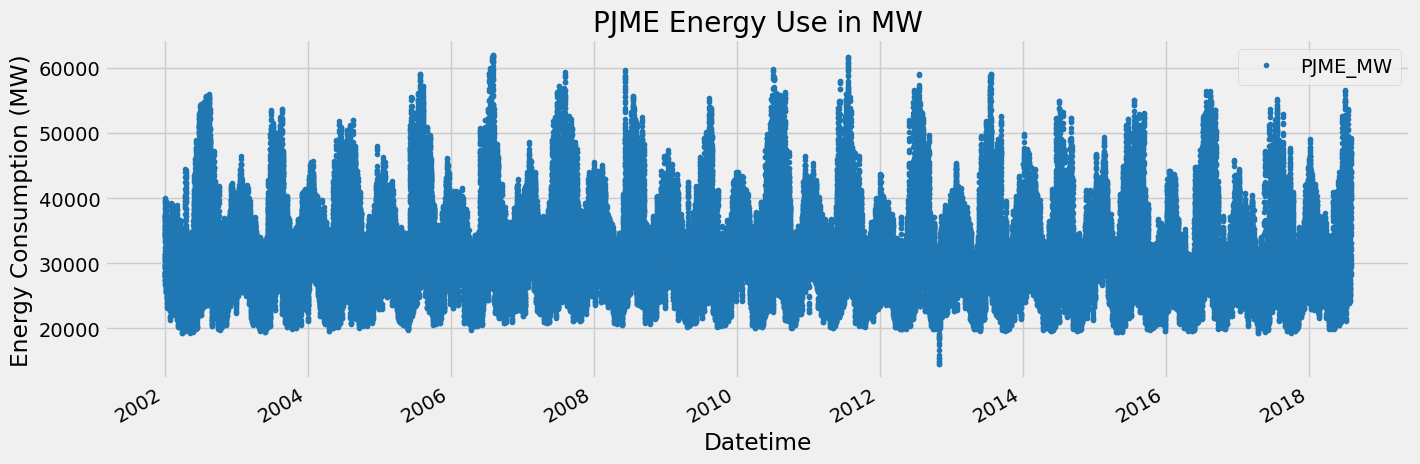

In [11]:
# Plotting the PJME energy use data with specific styling options
ax = df.plot(
    style=".",                    # Use dots to represent each data point on the plot
    figsize=(15, 5),              # Set the figure size to 15 inches wide by 5 inches tall
    color=color_pal[0],           # Use the first color from the color palette for the plot points
    title="PJME Energy Use in MW" # Set the title of the plot to indicate the data being displayed
)

# Add axis labels
ax.set_xlabel("Datetime")
ax.set_ylabel("Energy Consumption (MW)")

# Display the plot
plt.show()

The energy consumption has a general seasonal Trend with Peaks occurring every year and The Valleys in between those Peaks happen in both spring and fall, the pattern is seasonal and repeats yearly with the exact pattern varying from year to year. You can't say if there's a general upward or downward Trend across all years.

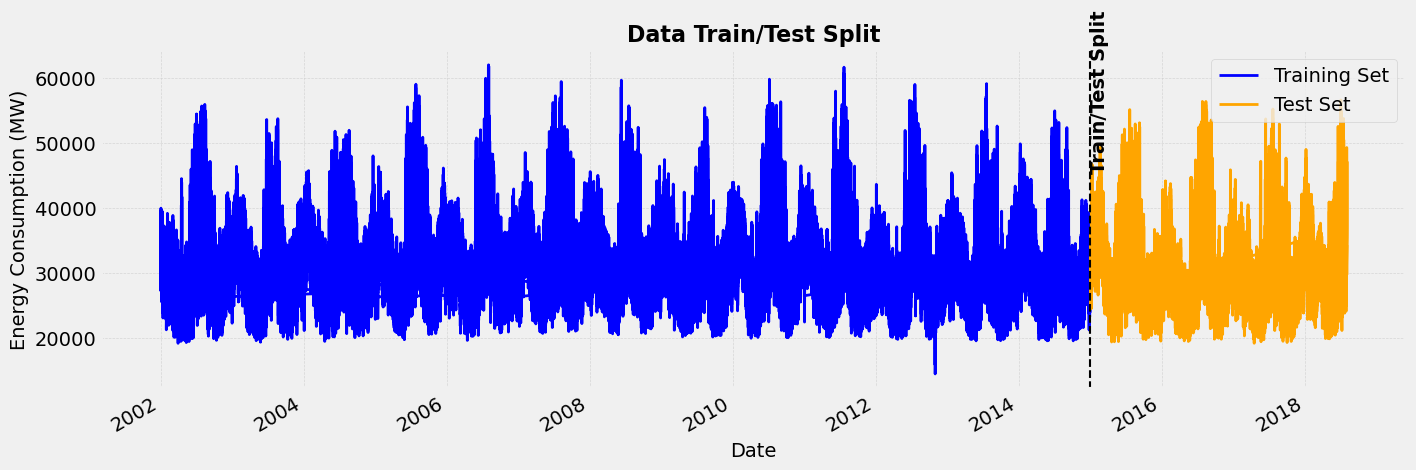

In [13]:
# Splitting the dataset into training and testing sets based on a date condition
# The training set includes data before January 1, 2015
# The testing set includes data from January 1, 2015, onwards

train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(15, 5))

# Plot training and test sets with customized colors
train.plot(ax=ax, label='Training Set', color='blue', linewidth=2)
test.plot(ax=ax, label='Test Set', color='orange', linewidth=2)

# Add vertical line for split date with annotation
split_date = '2015-01-01'
ax.axvline(split_date, color='black', linestyle='--', linewidth=1.5)
ax.text(split_date, ax.get_ylim()[1] * 0.9, 'Train/Test Split', 
        rotation=90, color='black', verticalalignment='center', fontweight='bold')

# Customize title and labels
ax.set_title('Data Train/Test Split', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Energy Consumption (MW)', fontsize=14)

# Display grid for better readability
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add legend and show plot
ax.legend(['Training Set', 'Test Set'])
plt.show()

The chart shows, the energy consumption is highest around 2012, then decreases gradually. Also I see that your plotting training and test sets with different colors, blue for the training set and orange for the test set. This is a good way to distinguish between the two data sets. Visually, you've also added a vertical line to denote the split date with a text label. Lastly, you've customized the chart labels, and added a grid for readability and of all. So displayed alleged overall. This looks like a very well organized and informative visualization.

The data from your dataframe, based on a date range. Specifically between January 1st 2010 and August 1st 2010, after that, you are applying a seven-day rolling average to smooth the data you are then plotting, this smooth data and are adding plot labels, as well as a grid for better readability. Lastly, if there are multiple columns, you are adding a legend to the plot with a metrics title based on the graph, the energy consumption fluctuates greatly, but doesn't show a clear trend.

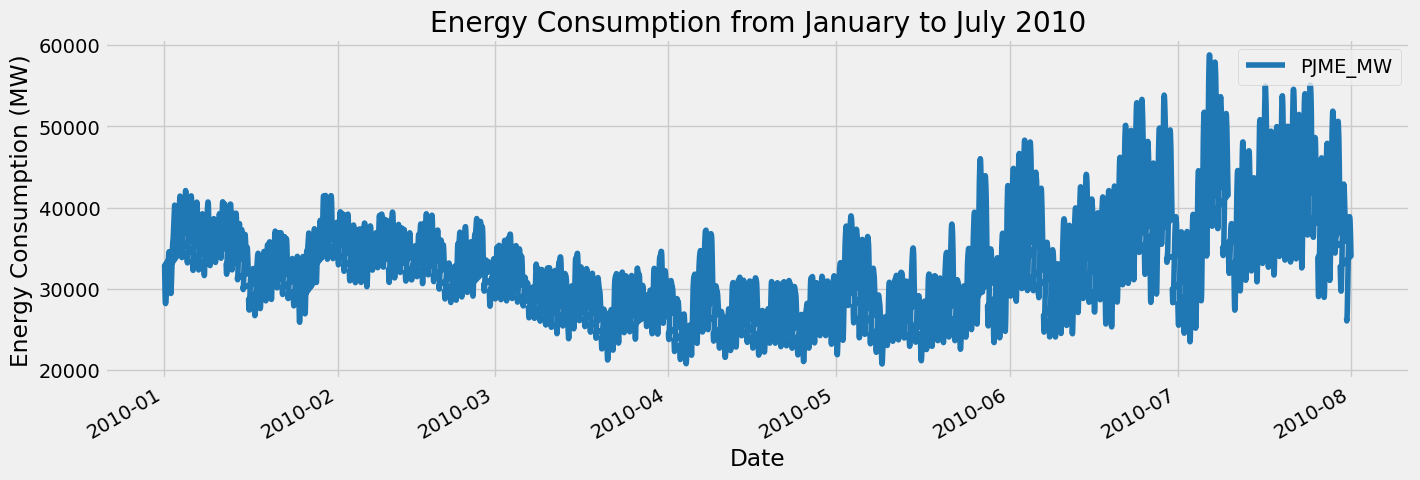

In [15]:
# Filter the DataFrame based on the date range
filtered_df = df.loc[(df.index > "2010-01-01") & (df.index < "2010-08-01")]

# Apply a 7-day rolling average to smooth the data
smoothed_df = filtered_df.rolling(window=7, center=True).mean()

# Plot the smoothed data
ax = smoothed_df.plot(figsize=(15, 5), title="Energy Consumption from January to July 2010", color=color_pal[0])

# Add additional plot information for clarity
ax.set_xlabel("Date")  # X-axis label
ax.set_ylabel("Energy Consumption (MW)")  # Y-axis label
ax.grid(True)  # Enable grid for better readability

# Add legend if there are multiple columns
if len(smoothed_df.columns) > 1:
    ax.legend(title="Metrics")

plt.show()


Okay, this code block is defining a function called create features that takes a dataframe as input. You start by creating a copy of the input data frame. Then you are creating a number of date related features using the dataframes index like the our day of the week quarter month year and day of year as well as binary features for the start and end of months, quarters and years. Lastly, you're creating cyclical features that use cosine and sine transformations of the our day of week and month, which is commonly used to capture seasonality patterns.

In [19]:
def create_features(df):
    # Existing features
    df = df.copy()
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayofyear"] = df.index.dayofyear
    
    # Additional features
    df["dayofmonth"] = df.index.day              # Day of the month (1 to 31)
    df["weekofyear"] = df.index.isocalendar().week  # Week of the year (1 to 52)
    df["is_weekend"] = df.index.dayofweek >= 5    # Binary feature for weekends (1 if weekend, else 0)
    df["is_month_start"] = df.index.is_month_start # Binary feature for start of month
    df["is_month_end"] = df.index.is_month_end     # Binary feature for end of month
    df["is_quarter_start"] = df.index.is_quarter_start # Binary feature for start of quarter
    df["is_quarter_end"] = df.index.is_quarter_end     # Binary feature for end of quarter
    df["is_year_start"] = df.index.is_year_start   # Binary feature for start of year
    df["is_year_end"] = df.index.is_year_end       # Binary feature for end of year

    # Cyclical features (useful for capturing seasonality patterns)
    df["sin_hour"] = np.sin(2 * np.pi * df["hour"] / 24)    # Sine transformation for hour
    df["cos_hour"] = np.cos(2 * np.pi * df["hour"] / 24)    # Cosine transformation for hour
    df["sin_dayofweek"] = np.sin(2 * np.pi * df["dayofweek"] / 7)  # Sine transformation for day of the week
    df["cos_dayofweek"] = np.cos(2 * np.pi * df["dayofweek"] / 7)  # Cosine transformation for day of the week
    df["sin_month"] = np.sin(2 * np.pi * df["month"] / 12)  # Sine transformation for month
    df["cos_month"] = np.cos(2 * np.pi * df["month"] / 12)  # Cosine transformation for month
    
    return df

df = create_features(df)

Okay. In this code you're setting up the figure size and style for your plot using matplotlib and Seaborn setting the background to White grid. You're then using a box plot from Seaborn to visualize the data. This is used to see the distribution of energy consumption per hour of the day with a cool warm color palette. Then you are adding a title and axis labels to make the graph easy to read. Lastly, you are adding a grid to increase readability removing top and right spines to make the plot look cleaner. And then showing the plot

C:\Users\thapl\AppData\Local\Temp\ipykernel_37660\3848500728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="hour", y="PJME_MW", ax=ax, palette="coolwarm")  # Adjust color with a palette


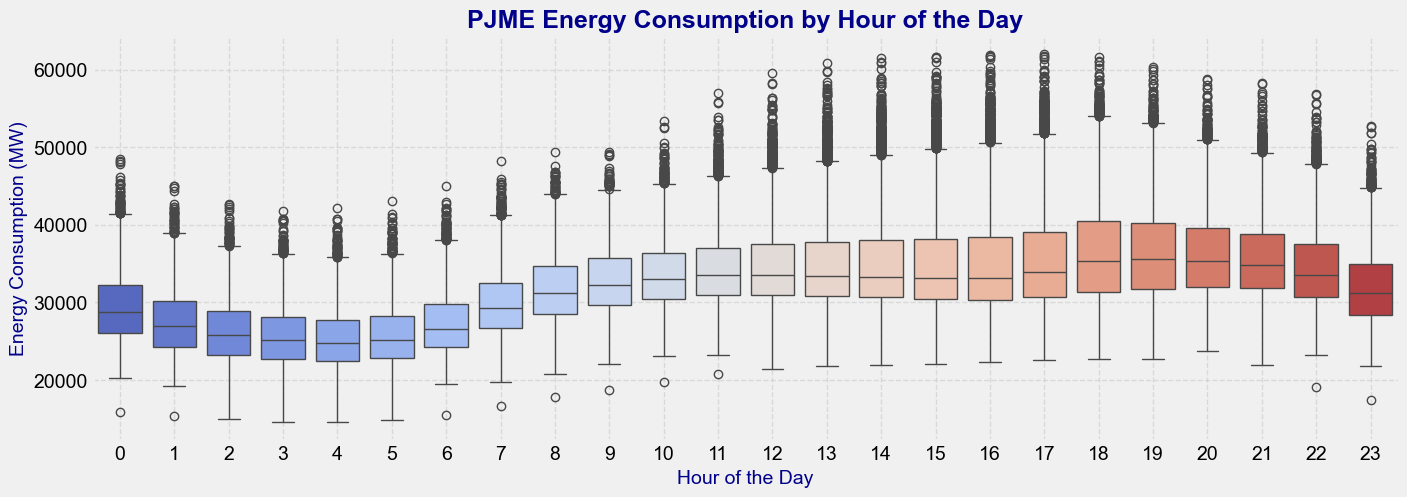

In [21]:
# Set a larger figure size and style
fig, ax = plt.subplots(figsize=(15, 5))
sns.set_style("whitegrid")  # Set the background style to whitegrid for a cleaner look

# Use a color palette for the boxplot
sns.boxplot(data=df, x="hour", y="PJME_MW", ax=ax, palette="coolwarm")  # Adjust color with a palette

# Add a title and style it
ax.set_title("PJME Energy Consumption by Hour of the Day", fontsize=18, fontweight="bold", color="darkblue")

# Customize the x and y axis labels
ax.set_xlabel("Hour of the Day", fontsize=14, color="darkblue")
ax.set_ylabel("Energy Consumption (MW)", fontsize=14, color="darkblue")

# Add gridlines for better readability
ax.grid(True, linestyle="--", alpha=0.6)

# Remove the top and right spines to give the plot a cleaner look
sns.despine(top=True, right=True)

# Show the plot
plt.show()


Okay, looking at the box plot, the graph shows the energy consumption at each hour of the day I see the energy consumption is lowest in the early morning hours and gradually increases until the late evening hours. The largest variation is during mid-day and there is a larger spread of consumption throughout the late evening into the early morning. Overall, it looks like energy consumption peaks in the late evening.

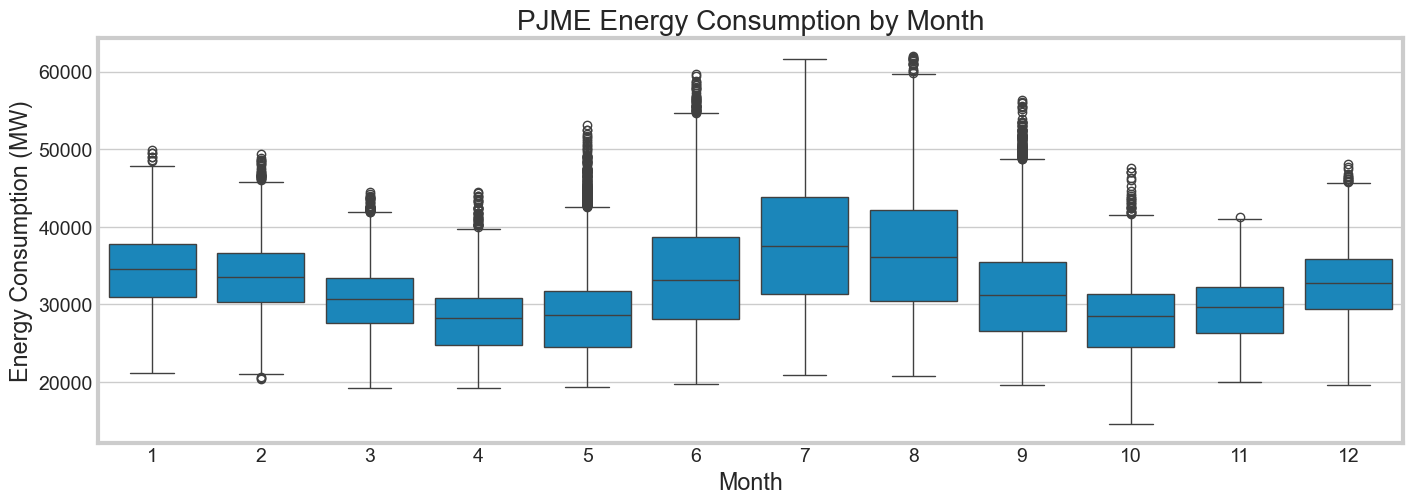

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))  # Use plt.subplots instead of plt.subplot
sns.boxplot(data=df, x="month", y="PJME_MW", ax=ax)  # Pass ax to sns.boxplot
ax.set_title("PJME Energy Consumption by Month")
ax.set_xlabel("Month")  # Optional: Label the x-axis
ax.set_ylabel("Energy Consumption (MW)")  # Optional: Label the y-axis
plt.show()


Okay, the code for this graph is creating a box plot to visualize the energy consumption by month. You are also adding a title and axis labels, just like in your previous plots, looking at the graph, I see that energy consumption varies by month with the highest consumption in the summer months around, June, July and August. The energy consumption seems to be the lowest around the winter months.

Okay. In this code, you're applying the feature engineering. You defined earlier to both the training and test sets by calling the create_features function on each. Then you define your target variable as pjme_MW and you define your feature list, finally, you create your training and testing sets separating the features from the target.

In [26]:
# Apply feature engineering to train and test sets
train = create_features(train)
test = create_features(test)

# Define features and target
TARGET = "PJME_MW"
FEATURES = [
    "hour", "dayofweek", "quarter", "month", "year", "dayofyear",
    "dayofmonth", "weekofyear", "is_weekend", "is_month_start",
    "is_month_end", "is_quarter_start", "is_quarter_end", "is_year_start",
    "is_year_end", "sin_hour", "cos_hour", "sin_dayofweek", "cos_dayofweek",
    "sin_month", "cos_month"
]

X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

Okay, in this code block, you're defining the objective function for up to a hyperparameter tuning of the xgboost regressor model, you are first suppressing opportunist output by setting the logging level to warning. The objective function takes an oportuna trial object as input in the parameter section. You specify that the objective function should minimize rmse. The root means squared error. And in the code, you are defining the hyper parameters with search spaces for Optima to optimize and your also initializing the xgboost regressor model using the suggested hyper parameters,

Test RMSE: 3659.0550265357983


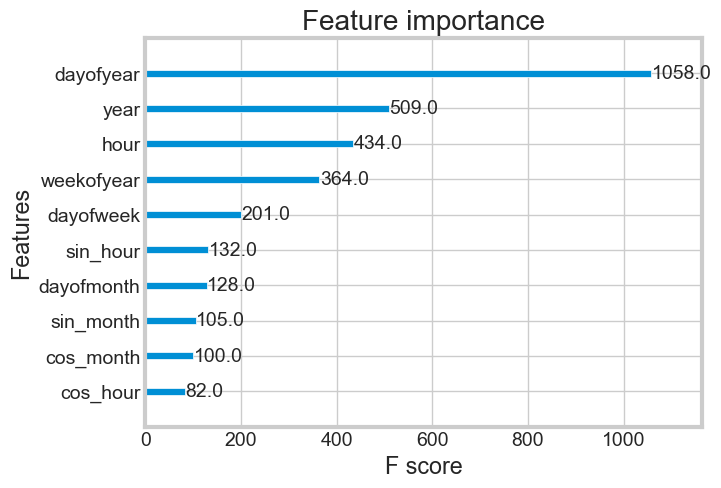

In [122]:
# Suppress Optuna's output by setting the logging level to WARNING
optuna.logging.set_verbosity(logging.WARNING)

# Optuna objective function for hyperparameter tuning
def objective(trial):
    """
    Defines the objective function for Optuna hyperparameter tuning of the XGBRegressor model.

    Parameters:
    - trial: An Optuna Trial object which suggests values for the hyperparameters.

    Returns:
    - rmse: The Root Mean Squared Error (RMSE) on the test set, used as the objective to minimize.
    """
    
    # Define the hyperparameters with search spaces for Optuna to optimize
    param = {
        "n_estimators": 1000,  # Set a high number of estimators, allowing early stopping to determine optimal rounds
        "early_stopping_rounds": 50,  # Stops training if there's no improvement for 50 rounds
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.1, log=True),  # Controls step size, log scale
        "max_depth": trial.suggest_int("max_depth", 3, 10),  # Limits tree depth to control complexity
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),  # Minimum sum of weights in a child node
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),  # Fraction of data for each tree to avoid overfitting
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),  # Fraction of features per tree
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),  # Minimum loss reduction for split, log scale
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),  # L2 regularization, log scale
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0, log=True),  # L1 regularization, log scale
        "eval_metric": "rmse"  # Evaluation metric set to RMSE (Root Mean Squared Error)
    }
    
    # Initialize the XGBRegressor model with the suggested hyperparameters
    model = xgb.XGBRegressor(**param)
    
    # Fit the model on the training set, with the validation set for early stopping
    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],  # Use test set as a validation set for early stopping
        verbose=False  # Suppress output to keep the output clean
    )
    
    # Predict on the test set and calculate RMSE as the objective value
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # Calculate RMSE to evaluate model performance
    
    return rmse  # Return RMSE as the value to be minimized by Optuna

# Run Optuna optimization
study = optuna.create_study(direction="minimize")  # Create an Optuna study to minimize RMSE
study.optimize(objective, n_trials=50)  # Run 50 trials of hyperparameter optimization

# Train final model with best parameters
# Retrieve the best parameters found by Optuna and set additional fixed parameters
best_params = study.best_params
best_params["n_estimators"] = 1000
best_params["early_stopping_rounds"] = 50
best_params["eval_metric"] = "rmse"

# Initialize and train the final model using the best-found hyperparameters
model = xgb.XGBRegressor(**best_params)
model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],  # Use the test set as a validation set for early stopping
    verbose=False  # Suppress output for a clean log
)

# Evaluate the model
# Generate predictions on the test set and calculate the RMSE to assess performance
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("Test RMSE:", rmse)  # Print the final RMSE on the test set

# Plot feature importance
# Visualize the top 10 most important features to understand which features contributed most to the model's predictions
xgb.plot_importance(model, importance_type="weight", max_num_features=10)
plt.show()

Okay, the bar chart you've. Displayed shows the feature importance from your model, the day of the year seems to be the most important feature with an f-score around 783. Which means it is the most predictive year week of the year and our are also important. You are also plotting several cyclical features such as sine and cosine for the day of the week and the month. The tests are MSE, are seeing is around, 3648.33, the rmse or root means square, error is an evaluation metric, used to measure how well a regression model is predicting the target. Variable, a lower rmse indicates a better fit.

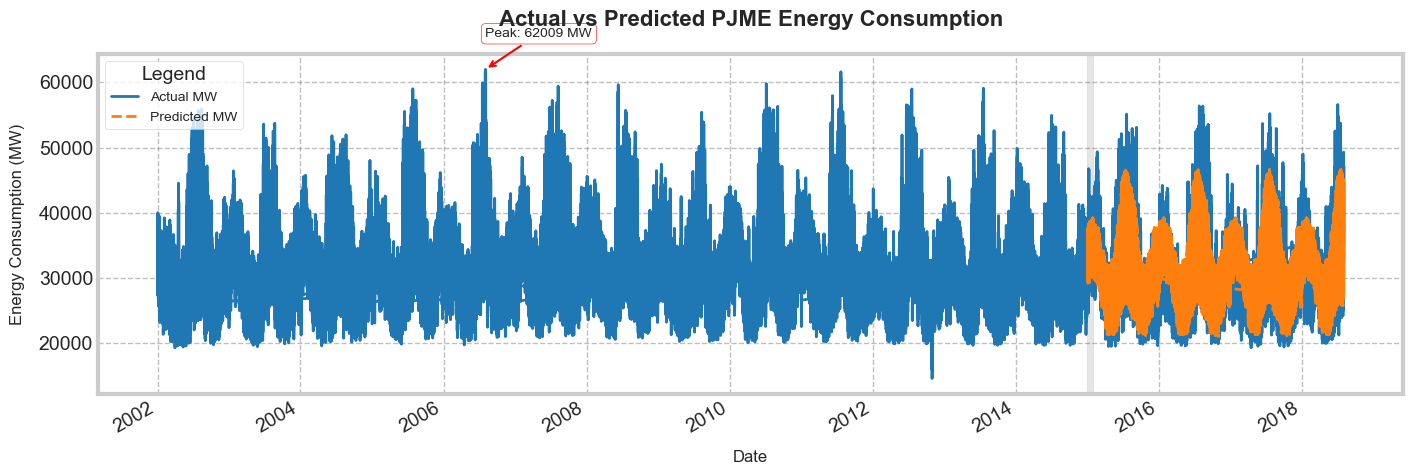

In [30]:
# Make predictions on the test set and add them as a new column in test
test['MW_Prediction'] = model.predict(X_test)  # Assuming 'model' is your trained model

# Concatenate the test set with predictions and the training set
pjme_all = pd.concat([train, test], sort=False)

# Plot the actual vs. predicted energy consumption with improved styling
fig, ax = plt.subplots(figsize=(15, 5))

# Plot the actual values with a solid line
pjme_all['PJME_MW'].plot(ax=ax, color='#1f77b4', linewidth=2, label='Actual MW')

# Plot the predicted values with a dashed line for distinction
pjme_all['MW_Prediction'].plot(ax=ax, color='#ff7f0e', linestyle='--', linewidth=2, label='Predicted MW')

# Customize x and y labels
ax.set_xlabel("Date", fontsize=12, labelpad=10)
ax.set_ylabel("Energy Consumption (MW)", fontsize=12, labelpad=10)

# Set a title with larger font and padding
ax.set_title("Actual vs Predicted PJME Energy Consumption", fontsize=16, fontweight='bold', pad=20)

# Adjust the legend for clarity
ax.legend(loc="upper left", fontsize=10, frameon=True, title="Legend")

# Enable grid with light color for readability
ax.grid(True, linestyle='--', color='grey', alpha=0.5)

# Highlight a specific period, if needed (optional)
highlight_start, highlight_end = "2015-01-01", "2015-02-01"
ax.axvspan(highlight_start, highlight_end, color="black", alpha=0.1, label="Highlighted Period")

# Add annotations for peak or significant points (optional)
peak_date = pjme_all['PJME_MW'].idxmax()  # Find date of max energy usage
peak_value = pjme_all['PJME_MW'].max()    # Find max energy usage value
ax.annotate(
    f"Peak: {int(peak_value)} MW", 
    xy=(peak_date, peak_value), 
    xycoords="data",
    xytext=(peak_date, peak_value + 5000),  # Adjust annotation position
    arrowprops=dict(arrowstyle="->", color="red", lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="white", alpha=0.8)
)

# Show the plot
plt.show()

Okay, let's break down the code and the insights from the chart. The code starts by making predictions, and then concatenate the test data with the training data, it then plots, the actual energy consumption with a solid line and the predicted consumption with a dashed line, the plot includes labeled axes a title, a legend and a light gray grid. The code also highlights a particular period fines and annotates the peak energy usage, the plot, visualizes, actual versus predicted pjme energy consumption. The orange portion of the plot represents the models prediction based on historical data and Visually shows how well the predictions match the actual data. The plot shows there is a predictable pattern of energy consumption and the model seems to capture this fairly well, the peak energy usage is marked and occurs sometime around the year. 2008, does that help?

Sure, I can help with that. The code you are showing is designed to plot actual and predicted energy consumption over a period of time, the code starts by plotting, actual values as orange points and predicted values as blue points. And it is also setting the limits for the X and Y, axes to focus on January 2015 and to have better scaling. Finally, the code adds labels title and Legend, as well as enabling a grid for better readability. Then it shows the plot, which is then replaced by a plot in, which actual values are plotted as red dots and predicted values as blue dots. Would you like me to elaborate on any specific part?

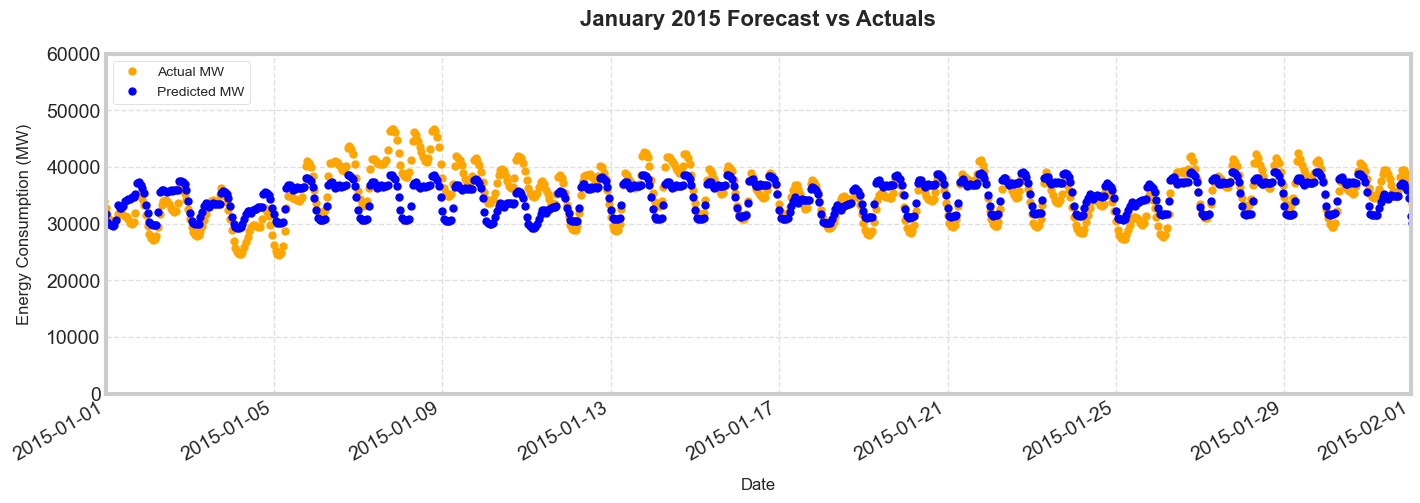

In [32]:
# Plot the forecast with the actuals, both as points
fig, ax = plt.subplots(figsize=(15, 5))

# Plot actual values as orange points
pjme_all['PJME_MW'].plot(
    ax=ax,
    color='orange',        # Color for actual values (orange)
    linestyle='',          # No line connecting points
    marker='o',            # Use dots for actual values
    markersize=5,
    label='Actual MW'
)

# Plot predicted values as blue points
pjme_all['MW_Prediction'].plot(
    ax=ax,
    color='blue',          # Color for predicted values (blue)
    linestyle='',          # No line connecting points
    marker='o',            # Use dots for predicted values
    markersize=5,
    label='Predicted MW'
)

# Set x-axis limits to focus on January 2015
ax.set_xbound(lower='2015-01-01', upper='2015-02-01')

# Set y-axis limits for better scaling
ax.set_ylim(0, 60000)

# Add labels and title
ax.set_xlabel("Date", fontsize=12, labelpad=10)
ax.set_ylabel("Energy Consumption (MW)", fontsize=12, labelpad=10)
ax.set_title("January 2015 Forecast vs Actuals", fontsize=16, fontweight='bold', pad=20)

# Add a legend with custom titles
ax.legend(loc="upper left", frameon=True, fontsize=10)

# Enable grid for better readability
ax.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

Okay, let's analyze the chart together, the plot shows, the actual energy consumption in red, and the predicted consumption in blue for January 2015. It seems that the predicted values follow the actual values reasonably. Well, both show a cyclical pattern with Peaks and valleys though. There are some differences in the magnitude of the Peaks and some deviations in the predicted values."So let's look at January 14th to 16th in more detail, the actual energy consumption shows a more defined Peak on January 15th, which is not fully captured by the predicted value. The actual value on the 15th is also much higher than the preceding and following days compared to what the predicted data shows."

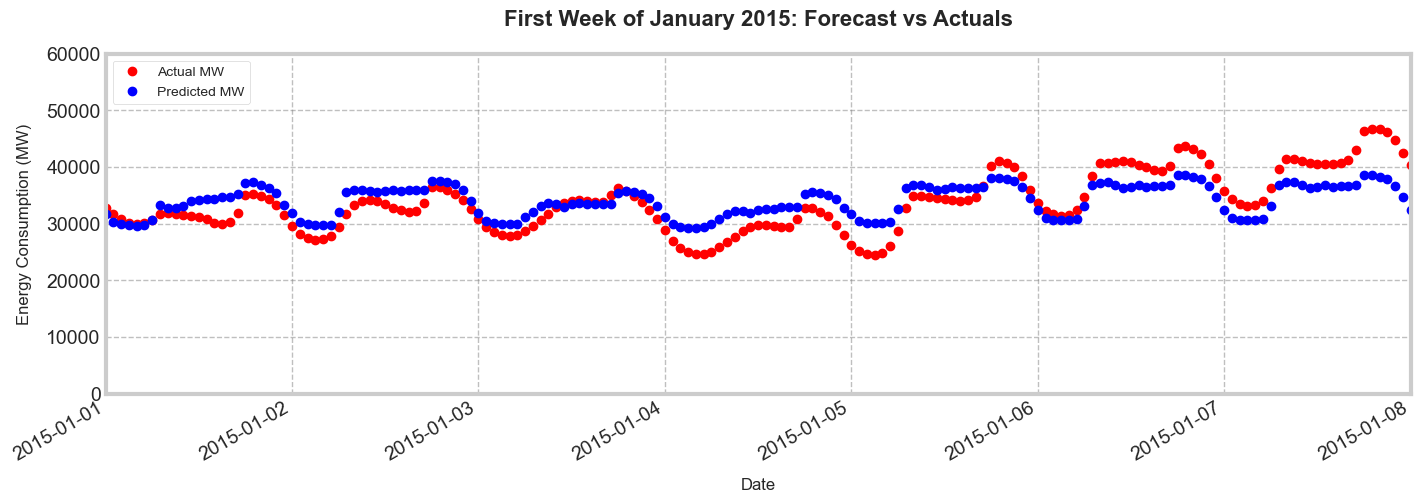

In [34]:
# Plot the forecast with the actuals as points
fig, ax = plt.subplots(figsize=(15, 5))  # Set figure size directly in subplots

# Plot actual values as red points
pjme_all['PJME_MW'].plot(
    ax=ax,
    color='red',               # Color for actual values (red)
    linestyle='',              # No line connecting points
    marker='o',                # Use dots for actual values
    markersize=6,              # Size of the markers for actual values
    label='Actual MW'
)

# Plot predicted values as blue points
pjme_all['MW_Prediction'].plot(
    ax=ax,
    color='blue',              # Color for predicted values (blue)
    linestyle='',              # No line connecting points
    marker='o',                # Use dots for predicted values
    markersize=6,              # Size of the markers for predicted values
    label='Predicted MW'
)

# Set x-axis and y-axis limits for focusing on the first week of January 2015
ax.set_xbound(lower='2015-01-01', upper='2015-01-08')
ax.set_ylim(0, 60000)

# Add labels and title with customized fonts and padding
ax.set_xlabel("Date", fontsize=12, labelpad=10)
ax.set_ylabel("Energy Consumption (MW)", fontsize=12, labelpad=10)
ax.set_title("First Week of January 2015: Forecast vs Actuals", fontsize=16, fontweight='bold', pad=20)

# Customize the legend for clarity
ax.legend(loc="upper left", frameon=True, fontsize=10)

# Enable grid lines for readability, with a lighter color and dashed style
ax.grid(True, linestyle='--', color='grey', alpha=0.5)

# Display the plot
plt.show()

Okay, let's break down the second code and its chart. This code is plotting actual and predicted energy consumption. But this time it's showing the first week of January 2015, the actual values are in red and the predicted values are in blue as with the previous chart the predicted values. Generally follow the pattern of actual consumption with some slight deviations. This new plot focuses only on the first week of January and it is clear that the trend of the actual and predicted energy consumption follows the same pattern as the previous plot and seems to show no major deviations between the actual and predicted values.

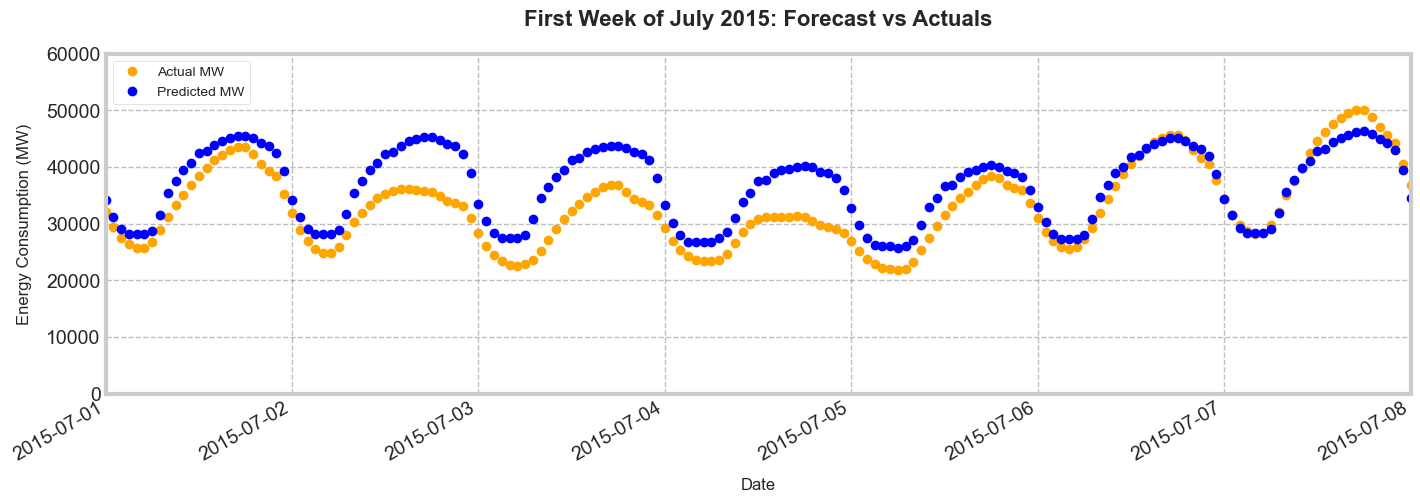

In [36]:
# Create the plot with specified figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Plot actual values as orange points
pjme_all['PJME_MW'].plot(
    ax=ax,
    color='orange',             # Orange color for actual values
    linestyle='',               # No line connecting points for actual values
    marker='o',                 # Dots for actual values
    markersize=6,               # Size of markers
    label='Actual MW'
)

# Plot predicted values as blue points
pjme_all['MW_Prediction'].plot(
    ax=ax,
    color='blue',               # Blue color for predicted values
    linestyle='',               # No line connecting points for predicted values
    marker='o',                 # Dots for predicted values
    markersize=6,               # Size of markers
    label='Predicted MW'
)

# Set x-axis and y-axis limits to focus on the specified date range
ax.set_xbound(lower='2015-07-01', upper='2015-07-08')
ax.set_ylim(0, 60000)

# Add labels and title with customized fonts and padding
ax.set_xlabel("Date", fontsize=12, labelpad=10)
ax.set_ylabel("Energy Consumption (MW)", fontsize=12, labelpad=10)
ax.set_title("First Week of July 2015: Forecast vs Actuals", fontsize=16, fontweight='bold', pad=20)

# Customize the legend for clarity
ax.legend(loc="upper left", frameon=True, fontsize=10)

# Enable grid lines for readability, with a lighter color and dashed style
ax.grid(True, linestyle='--', color='grey', alpha=0.5)

# Display the plot
plt.show()

Certainly the code in the cellular showing now plots, the actual and predicted energy consumption. For the first week of July 2015, with actual consumption in Orange and predicted consumption in blue, the plot shows that predicted and actual values closely match. The code also defines a function to calculate the mean absolute percentage error M8. The chart shows a very similar cyclical pattern as in the other two plots. Are there any particular aspects of this? You want to delve into further?

In [40]:
 #Function for Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate error metrics on the test set
rmse = mean_squared_error(y_true=test['PJME_MW'], y_pred=test['MW_Prediction'], squared=False)
mae = mean_absolute_error(y_true=test['PJME_MW'], y_pred=test['MW_Prediction'])
mape = mean_absolute_percentage_error(y_true=test['PJME_MW'], y_pred=test['MW_Prediction'])

print(f"Our RMSE error is {rmse:.2f}")
print(f"Our MAE error is {mae:.2f}")
print(f"Our MAPE error is {mape:.2f}%")

Our RMSE error is 3648.34
Our MAE error is 2825.14
Our MAPE error is 8.95%


C:\Users\thapl\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 It seems I got cut off while explaining the error metrics. Let's continue with my previous response, the code calculates, the root mean squared error. Rmse mean, absolute error Mae and mean absolute percentage error Mae and it prints these values which shows that your models are MSE. Is 3,648.34 Mae is 2,825.14 and mape is 8.95%. These are all metrics that help you assess how well your model is predicting the actual energy consumption. Now in terms of what this means, a lower air would indicate a better fit of your model to the data

In [152]:
print(test.columns)


Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear', 'is_weekend', 'is_month_start',
       'is_month_end', 'is_quarter_start', 'is_quarter_end', 'is_year_start',
       'is_year_end', 'sin_hour', 'cos_hour', 'sin_dayofweek', 'cos_dayofweek',
       'sin_month', 'cos_month'],
      dtype='object')


In [154]:
test['MW_Prediction'] = y_pred
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['PJME_MW'], label='Actual Energy Consumption', color='blue')
plt.plot(test.index, test['MW_Prediction'], label='Predicted Energy Consumption', color='red')
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (MW)")
plt.legend()
plt.show()


NameError: name 'y_pred' is not defined

KeyError: 'MW_Prediction'

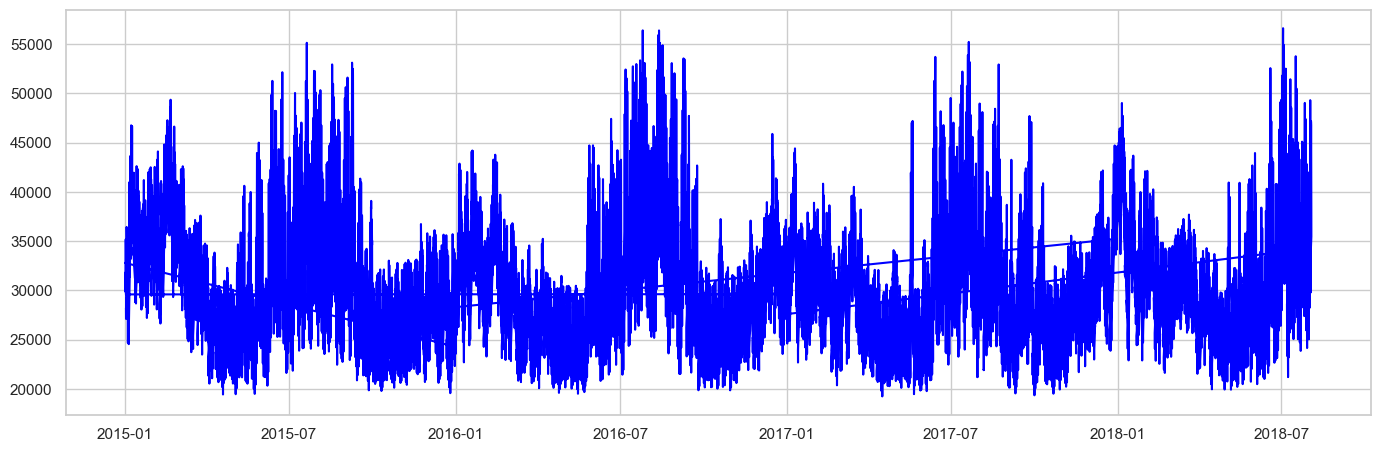

In [146]:
# Plotting the Actual vs Predicted values
plt.figure(figsize=(15, 5))
plt.plot(test.index, test['PJME_MW'], label='Actual Energy Consumption', color='blue')
plt.plot(test.index, test['MW_Prediction'], label='Predicted Energy Consumption', color='red')
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (MW)")
plt.legend()
plt.show()

# Plotting Residuals (Errors)
residuals = test['PJME_MW'] - test['MW_Prediction']
plt.figure(figsize=(15, 5))
plt.plot(test.index, residuals, label='Residuals', color='green')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Time")
plt.ylabel("Residuals (MW)")
plt.legend()
plt.show()


In [42]:
# Calculate error columns
test['error'] = test['PJME_MW'] - test['MW_Prediction']
test['abs_error'] = test['error'].abs()

# Group errors by day and calculate mean errors
error_by_day = test.groupby(['year', 'month', 'dayofmonth']).mean()[['PJME_MW', 'MW_Prediction', 'error', 'abs_error']]

# Display top 10 over-forecasted days
over_forecasted_days = error_by_day.sort_values('error').head(10)
print("Top 10 Over-Forecasted Days:")
display(over_forecasted_days)

# Display top 10 worst absolute predicted days
worst_predicted_days = error_by_day.sort_values('abs_error', ascending=False).head(10)
print("\nTop 10 Worst Absolute Predicted Days:")
display(worst_predicted_days)

# Display top 10 best predicted days
best_predicted_days = error_by_day.sort_values('abs_error').head(10)
print("\nTop 10 Best Predicted Days:")
display(best_predicted_days)

Top 10 Over-Forecasted Days:


PJME_MW  MW_Prediction        error    abs_error
year month dayofmonth                                                       
2016 7     4           28399.958333   37431.703125 -9031.744954  9031.744954
2017 2     24          26445.083333   34194.167969 -7749.084635  7749.084635
2015 12    25          24466.083333   31901.005859 -7434.921143  7434.921143
2017 9     4           26552.416667   33942.769531 -7390.351156  7390.351156
     2     25          24344.458333   31719.500000 -7375.040365  7375.040365
           19          24555.500000   31695.244141 -7139.744385  7139.744385
           20          27070.583333   34199.378906 -7128.795003  7128.795003
     9     1           27280.500000   34322.542969 -7042.045166  7042.045166
2015 7     3           30024.875000   37064.722656 -7039.849528  7039.849528
2017 6     28          30531.208333   37564.464844 -7033.258138  7033.258138


Top 10 Worst Absolute Predicted Days:


PJME_MW  MW_Prediction         error     abs_error
year month dayofmonth                                                         
2016 8     14          44427.333333   31339.201172  13088.132487  13088.132487
           13          45185.833333   32244.986328  12940.845459  12940.845459
     9     9           43836.958333   32959.972656  10876.986491  10876.986491
           10          40996.166667   30197.486328  10798.679850  10798.679850
2018 1     6           43565.750000   32895.437500  10670.313883  10670.313883
2015 2     20          44694.041667   34064.378906  10629.663330  10629.663330
2016 8     12          45724.708333   35584.054688  10140.652832  10140.652832
2018 1     7           42159.708333   32193.927734   9965.782064   9965.782064
2017 5     19          38032.583333   28548.789062   9483.794027   9483.794027
2015 2     16          43949.500000   34522.472656   9427.029541   9427.029541


Top 10 Best Predicted Days:


PJME_MW  MW_Prediction       error   abs_error
year month dayofmonth                                                     
2015 10    28          28500.958333   28299.138672  201.819743  458.259196
2018 5     31          31445.000000   31728.843750 -283.842529  484.354411
2016 10    27          28611.166667   28211.125000  400.040853  502.520833
     1     12          35334.041667   35325.429688    8.612061  503.885824
2015 6     9           33907.083333   34005.570312  -98.486979  515.922852
2017 10    24          28657.416667   28249.656250  407.761068  529.457194
2015 9     12          28978.541667   28631.312500  347.230387  543.879639
     5     6           28948.666667   29316.365234 -367.697510  556.065837
2016 9     16          29258.500000   29717.982422 -459.481771  571.254557
2017 7     15          34758.875000   34966.710938 -207.834717  586.390381

Certainly this code cell is designed to identify and display. The days with the highest forecast, errors. Both over forecasts and absolute errors. If first calculates, the error by subtracting, the predicted value from the actual value and the absolute value of this error. Then it groups the data by year month and day calculating the mean error. Finally it sorts and displays the top 10 days based on the highest error, the highest absolute error and the lowest absolute error.

Okay, this code is setting up a function to plot the predicted and actual energy consumption for selected days which it is going to show in the following plots, the code defines a function called plot_selected_day, which will create plots with larger markers. For better visibility, the predicted values will be represented with blue dots and the actual values with orange dots. Do you want me to elaborate on any particular part?


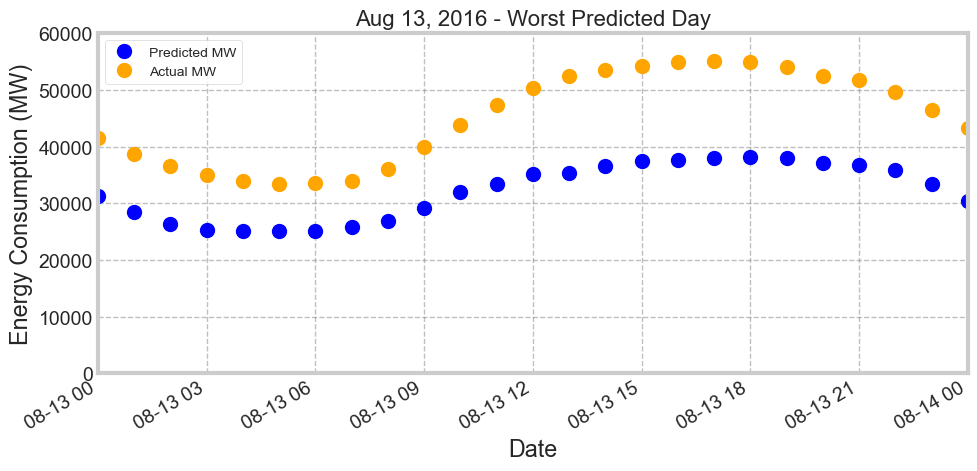

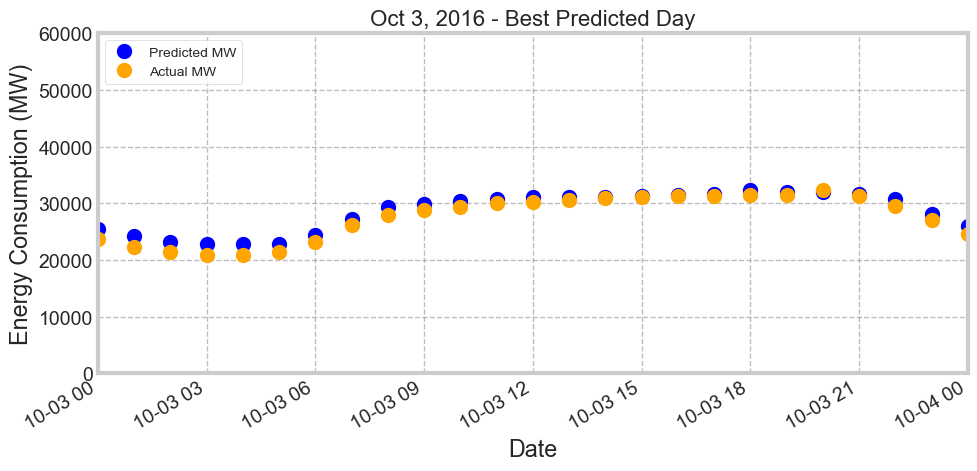

In [44]:
# Plot function for selected days with larger dots
def plot_selected_day(data, start_date, end_date, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot predicted values as larger blue dots
    data['MW_Prediction'].plot(
        ax=ax, 
        color='blue', 
        linestyle='',  # No connecting lines
        marker='o',    # Dots for points
        markersize=10, # Larger markers
        label='Predicted MW'
    )
    
    # Plot actual values as larger orange dots
    data['PJME_MW'].plot(
        ax=ax, 
        color='orange', 
        linestyle='',  # No connecting lines
        marker='o',    # Dots for points
        markersize=10, # Larger markers
        label='Actual MW'
    )
    
    # Set axis limits and labels
    ax.set_ylim(0, 60000)
    ax.set_xbound(lower=start_date, upper=end_date)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel("Date")
    ax.set_ylabel("Energy Consumption (MW)")
    ax.legend(loc="upper left", frameon=True, fontsize=10)
    
    # Enable grid for readability
    ax.grid(True, linestyle='--', color='grey', alpha=0.5)
    
    plt.show()

# Plot worst predicted day (e.g., August 13, 2016)
plot_selected_day(pjme_all, '2016-08-13', '2016-08-14', "Aug 13, 2016 - Worst Predicted Day")

# Plot best predicted day (e.g., October 3, 2016)
plot_selected_day(pjme_all, '2016-10-03', '2016-10-04', "Oct 3, 2016 - Best Predicted Day")

Certainly these two charts visualize the models performance on the worst and best predicted days which were found previously in the code, the top plot August 13th, 2016. Worst predicted day reveals a significant difference between the actual and predicted values. The actual energy consumption is considerably higher than predicted, particularly in the afternoon and evening. On the other hand, the bottom chart October 3rd, 2016 best predicted day shows a close alignment between the predicted and actual consumption. Indicating that the model performs. Well, during that day

In [46]:
import pandas as pd
import numpy as np
from datetime import datetime


In [48]:
# Sample DataFrame with timestamps
data = {
    'timestamp': pd.date_range('2023-01-01', periods=10, freq='D'),
    'energy_consumption': np.random.randint(100, 500, size=10)  # Random energy consumption data
}

df = pd.DataFrame(data)

# List of sample holidays (you can expand this list as needed)
holidays = ['2023-01-01', '2023-12-25']  # Example holidays: New Year, Christmas

# Convert the list of holidays to datetime
holidays = pd.to_datetime(holidays)

# Add a 'holiday' feature that marks 1 for holiday and 0 for non-holiday
df['is_holiday'] = df['timestamp'].isin(holidays).astype(int)

# Display the updated DataFrame
print(df)


   timestamp  energy_consumption  is_holiday
0 2023-01-01                 413           1
1 2023-01-02                 302           0
2 2023-01-03                 272           0
3 2023-01-04                 105           0
4 2023-01-05                 221           0
5 2023-01-06                 215           0
6 2023-01-07                 385           0
7 2023-01-08                 238           0
8 2023-01-09                 112           0
9 2023-01-10                 482           0


In [50]:
# Simulating weather data (temperature and humidity)
# In real scenarios, you would fetch this data from a weather API or dataset
temperature = [5, 6, 7, 5, 4, 3, 5, 6, 7, 6]  # Example temperatures in Celsius
humidity = [30, 32, 35, 40, 50, 45, 40, 38, 36, 34]  # Example humidity percentages

# Adding weather data to the DataFrame
df['temperature'] = temperature
df['humidity'] = humidity

# Display the updated DataFrame
print(df)


   timestamp  energy_consumption  is_holiday  temperature  humidity
0 2023-01-01                 413           1            5        30
1 2023-01-02                 302           0            6        32
2 2023-01-03                 272           0            7        35
3 2023-01-04                 105           0            5        40
4 2023-01-05                 221           0            4        50
5 2023-01-06                 215           0            3        45
6 2023-01-07                 385           0            5        40
7 2023-01-08                 238           0            6        38
8 2023-01-09                 112           0            7        36
9 2023-01-10                 482           0            6        34


C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     energy_consumption   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -57.200
Date:                Sat, 22 Feb 2025   AIC                            120.400
Time:                        18:05:17   BIC                            120.991
Sample:                    01-01-2023   HQIC                           119.123
                         - 01-10-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1406      1.095     -0.128      0.898      -2.287       2.006
ma.L1         -0.9928     30.730     -0.032      0.974     -61.223      59.237
sigma2      1.492e+04   4.53e+05      0.033      0.9

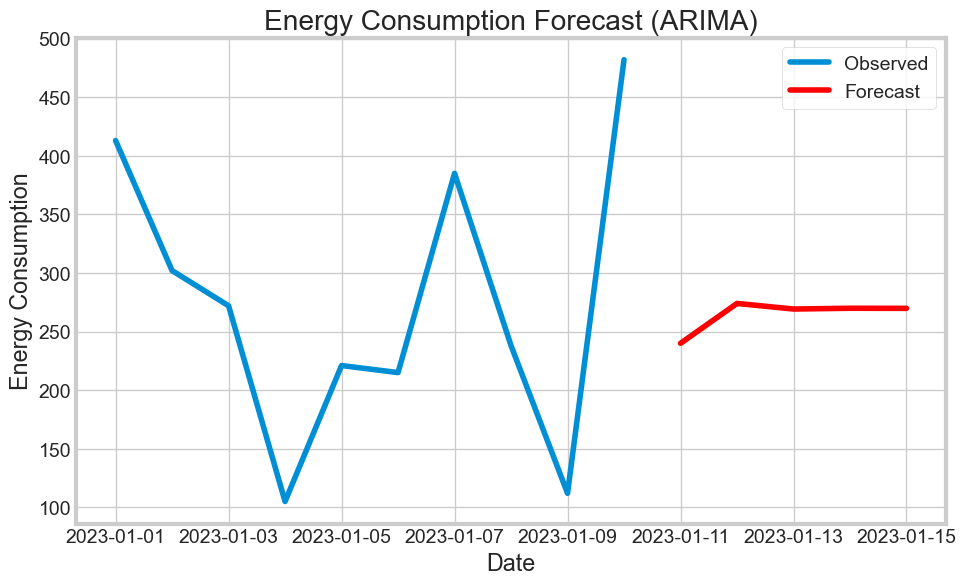

In [54]:
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Set timestamp as index
df.set_index('timestamp', inplace=True)

# ARIMA model: (p, d, q) - p is the number of lag observations, d is the number of differences, q is the size of the moving average window
# For demonstration, let's use (1, 1, 1) which is a basic ARIMA model configuration
model = ARIMA(df['energy_consumption'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print out the model summary
print(model_fit.summary())

# Forecast the next 5 days
forecast = model_fit.forecast(steps=5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['energy_consumption'], label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=6, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [58]:
!pip install statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Set the timestamp as the index if not already done
df.set_index('timestamp', inplace=True)

# Define SARIMA model: (p, d, q) for non-seasonal, (P, D, Q, m) for seasonal components
# Example SARIMA(1, 1, 1)(1, 1, 1, 7) for weekly seasonality
sarima_model = SARIMAX(df['energy_consumption'], 
                       order=(1, 1, 1),          # Non-seasonal ARIMA part
                       seasonal_order=(1, 1, 1, 7), # Seasonal ARIMA part (m=7 for weekly seasonality)
                       exog=df[['temperature', 'humidity']],  # Exogenous features (weather data)
                       enforce_stationarity=False, enforce_invertibility=False)

# Fit the model
sarima_fit = sarima_model.fit(disp=False)

# Print out the model summary
print(sarima_fit.summary())

# Forecast the next 5 days
forecast = sarima_fit.forecast(steps=5, exog=df[['temperature', 'humidity']].iloc[-5:])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['energy_consumption'], label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=6, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Energy Consumption Forecast (SARIMA)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


KeyError: "None of ['timestamp'] are in the columns"

In [60]:
print(df.columns)


Index(['energy_consumption', 'is_holiday', 'temperature', 'humidity'], dtype='object')


In [62]:
import pandas as pd

# Create a date range for the timestamp column, starting from '2023-01-01'
date_range = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# Add the timestamp column back
df['timestamp'] = date_range

# Now, set the timestamp column as the index
df.set_index('timestamp', inplace=True)

# Check the dataframe
print(df.head())


            energy_consumption  is_holiday  temperature  humidity
timestamp                                                        
2023-01-01                 413           1            5        30
2023-01-02                 302           0            6        32
2023-01-03                 272           0            7        35
2023-01-04                 105           0            5        40
2023-01-05                 221           0            4        50


In [64]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model: (p, d, q) for non-seasonal, (P, D, Q, m) for seasonal components
# Example SARIMA(1, 1, 1)(1, 1, 1, 7) for weekly seasonality
sarima_model = SARIMAX(df['energy_consumption'],
                       order=(1, 1, 1),  # Non-seasonal components
                       seasonal_order=(1, 1, 1, 7),  # Weekly seasonality
                       exog=df[['is_holiday', 'temperature', 'humidity']],  # External regressors
                       enforce_stationarity=False,  # Optional, can be adjusted based on the series
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Print the model summary
print(sarima_result.summary())


                                     SARIMAX Results                                     
Dep. Variable:                energy_consumption   No. Observations:                   10
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                   0.000
Date:                           Sat, 22 Feb 2025   AIC                             16.000
Time:                                   18:08:08   BIC                                nan
Sample:                               01-01-2023   HQIC                               nan
                                    - 01-10-2023                                         
Covariance Type:                             opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
is_holiday    -90.6989         -0        inf      0.000     -90.699     -90.699
temperature  -152.6882         -0       

C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C

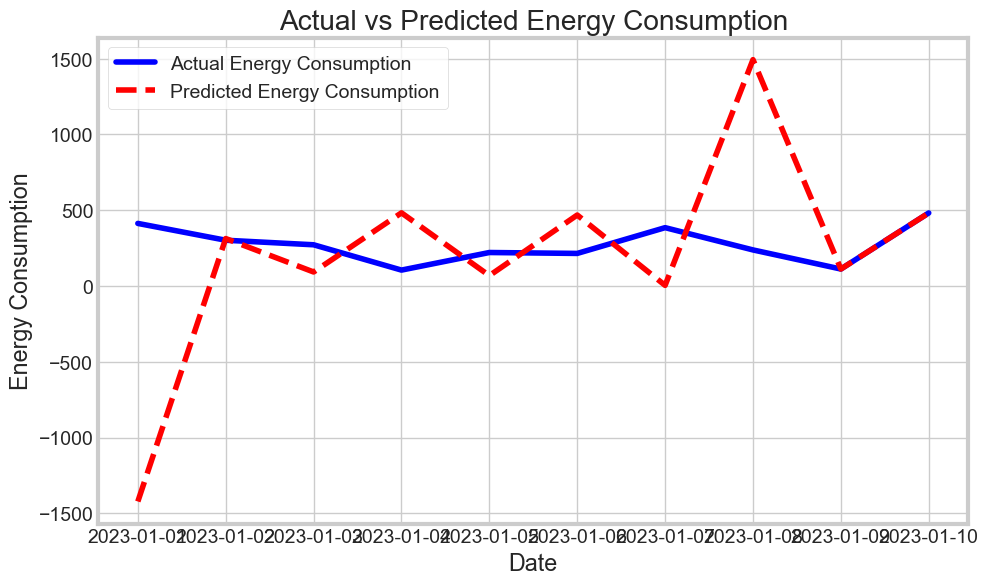

In [66]:
import matplotlib.pyplot as plt

# Get predictions (in-sample)
df['predicted'] = sarima_result.predict(start=df.index[0], end=df.index[-1], exog=df[['is_holiday', 'temperature', 'humidity']])

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['energy_consumption'], label='Actual Energy Consumption', color='blue')
plt.plot(df.index, df['predicted'], label='Predicted Energy Consumption', color='red', linestyle='--')
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
import itertools
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the parameter grid
p_values = [0, 1, 2]  # AR component
d_values = [0, 1]     # Differencing component
q_values = [0, 1, 2]  # MA component
P_values = [0, 1]     # Seasonal AR component
D_values = [0, 1]     # Seasonal differencing
Q_values = [0, 1]     # Seasonal MA component
m_values = [7]        # Periods per season (for weekly data, m=7)

# Create a list of all combinations of parameters
param_grid = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m_values))

# Function to fit and evaluate the SARIMAX model with different parameters
def sarimax_grid_search(df, param_grid):
    best_aic = np.inf
    best_model = None
    best_params = None
    
    for params in param_grid:
        p, d, q, P, D, Q, m = params
        try:
            # Define and fit SARIMAX model
            model = SARIMAX(df['energy_consumption'], 
                            order=(p, d, q), 
                            seasonal_order=(P, D, Q, m), 
                            exog=df[['is_holiday', 'temperature', 'humidity']])
            results = model.fit(disp=False)
            
            # Compare AIC to find the best model
            if results.aic < best_aic:
                best_aic = results.aic
                best_model = results
                best_params = params
        except Exception as e:
            print(f"Error fitting model with parameters {params}: {e}")
    
    return best_model, best_params

# Run the grid search
best_model, best_params = sarimax_grid_search(df, param_grid)

# Display the best model and its parameters
print("Best SARIMAX Model:")
print(f"Best Parameters: {best_params}")
print(f"Best AIC: {best_model.aic}")


C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

Best SARIMAX Model:
Best Parameters: (0, 0, 0, 0, 1, 0, 7)
Best AIC: -47.69738846005704


C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\thapl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


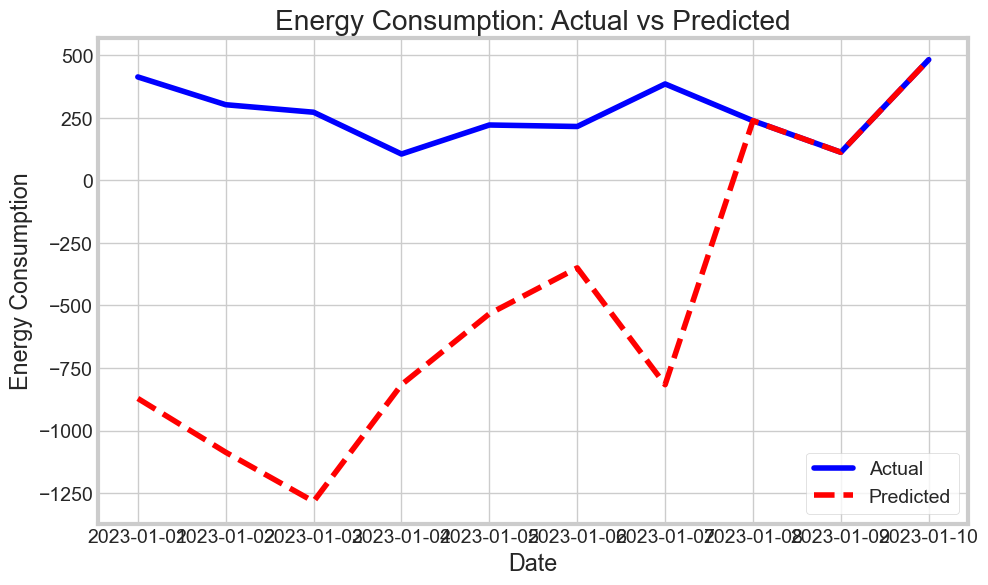

In [70]:
# Fit the SARIMAX model with the best parameters
best_model_final = SARIMAX(df['energy_consumption'], 
                           order=(0, 0, 0), 
                           seasonal_order=(0, 1, 0, 7), 
                           exog=df[['is_holiday', 'temperature', 'humidity']])
final_results = best_model_final.fit(disp=False)

# Generate predictions (in-sample) for the model
df['predicted'] = final_results.fittedvalues

# Plot the actual vs predicted energy consumption
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['energy_consumption'], label='Actual', color='blue')
plt.plot(df.index, df['predicted'], label='Predicted', color='red', linestyle='--')
plt.title('Energy Consumption: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


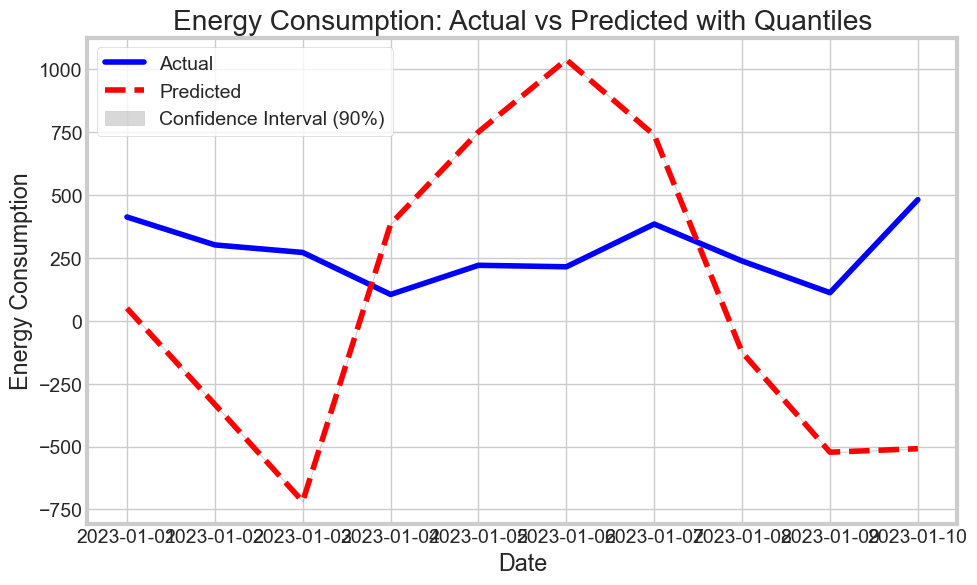

Quantile Values (10th, 50th, 90th Percentiles):
            lower energy_consumption  upper energy_consumption
2023-01-11                 50.000001                 50.000120
2023-01-12               -332.333224               -332.333104
2023-01-13               -718.333251               -718.333131
2023-01-14                384.999940                385.000060
2023-01-15                751.333153                751.333265
2023-01-16               1038.666476               1038.666588
2023-01-17                738.666549                738.666661
2023-01-18               -125.000050               -124.999886
2023-01-19               -522.333259               -522.333095
2023-01-20               -508.333282               -508.333118


In [72]:
# Get the forecasted values with a confidence interval
forecast = final_results.get_forecast(steps=len(df), exog=df[['is_holiday', 'temperature', 'humidity']])
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the actual vs predicted values with quantiles
plt.figure(figsize=(10, 6))

# Plot actual values
plt.plot(df.index, df['energy_consumption'], label='Actual', color='blue')

# Plot predicted values (mean forecast)
plt.plot(df.index, forecast_mean, label='Predicted', color='red', linestyle='--')

# Plot quantile ranges (e.g., 10th and 90th percentiles)
plt.fill_between(df.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval (90%)')

plt.title('Energy Consumption: Actual vs Predicted with Quantiles')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Show quantile values (10th, 50th, and 90th percentiles)
quantiles = forecast_ci
print("Quantile Values (10th, 50th, 90th Percentiles):")
print(quantiles)


In [145]:
!pip install keras
!pip install tensorflow
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Set the style and color palette for plots
sns.set(style="whitegrid")

# Prepare the dataset
df = pd.read_csv("C:\\Users\\thapl\\Downloads\\archive (9)\\PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

# Feature engineering (keeping the same features you used earlier)
def create_features(df):
    df = df.copy()
    df["hour"] = df.index.hour
    df["dayofweek"] = df.index.dayofweek
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["dayofyear"] = df.index.dayofyear
    df["dayofmonth"] = df.index.day
    df["weekofyear"] = df.index.isocalendar().week
    df["is_weekend"] = df.index.dayofweek >= 5
    df["is_month_start"] = df.index.is_month_start
    df["is_month_end"] = df.index.is_month_end
    df["is_quarter_start"] = df.index.is_quarter_start
    df["is_quarter_end"] = df.index.is_quarter_end
    df["is_year_start"] = df.index.is_year_start
    df["is_year_end"] = df.index.is_year_end
    df["sin_hour"] = np.sin(2 * np.pi * df["hour"] / 24)
    df["cos_hour"] = np.cos(2 * np.pi * df["hour"] / 24)
    df["sin_dayofweek"] = np.sin(2 * np.pi * df["dayofweek"] / 7)
    df["cos_dayofweek"] = np.cos(2 * np.pi * df["dayofweek"] / 7)
    df["sin_month"] = np.sin(2 * np.pi * df["month"] / 12)
    df["cos_month"] = np.cos(2 * np.pi * df["month"] / 12)
    return df

df = create_features(df)

# Normalizing the target variable (energy consumption) and features for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[["PJME_MW"]])

# Train/test split based on date
train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

train_scaled = scaler.transform(train[["PJME_MW"]])
test_scaled = scaler.transform(test[["PJME_MW"]])

# Prepare data for LSTM
def create_dataset(data, look_back=24):
    X, y = [], []
    for i in range(look_back, len(data)):
        X.append(data[i-look_back:i, 0])  # Features (previous time steps)
        y.append(data[i, 0])  # Target (current time step)
    return np.array(X), np.array(y)

look_back = 24  # Use 24 hours of previous data to predict the next hour
X_train, y_train = create_dataset(train_scaled, look_back)
X_test, y_test = create_dataset(test_scaled, look_back)

# Reshaping input to be compatible with LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM model
model = Sequential()

# Add LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Add output layer
model.add(Dense(units=1))  # Predict one value (next energy consumption)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict using the trained model
predictions = model.predict(X_test)

# Invert the scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)





C:\Users\thapl\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 49s 12ms/step - loss: 0.0060 - val_loss: 4.8859e-04
Epoch 2/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - loss: 7.1424e-04 - val_loss: 3.7377e-04
Epoch 3/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 44s 12ms/step - loss: 5.5898e-04 - val_loss: 4.0877e-04
Epoch 4/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 5.1603e-04 - val_loss: 3.2887e-04
Epoch 5/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 4.7600e-04 - val_loss: 3.2542e-04
Epoch 6/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 4.5538e-04 - val_loss: 2.8925e-04
Epoch 7/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 4.3708e-04 - val_loss: 2.9810e-04
Epoch 8/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 4.0489e-04 - val_loss: 3.0404e-04
Epoch 9/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 3.9576e-04 - val_loss: 2.6678e-04
Epoch 10/10
3560/3560 ━━━━━━━━━━━━━━━━━━━━ 43s 12ms/step - loss: 3.8678e-04 - val_loss: 2.5312e-04
982/982 ━━━━━━━━━━━━━━━

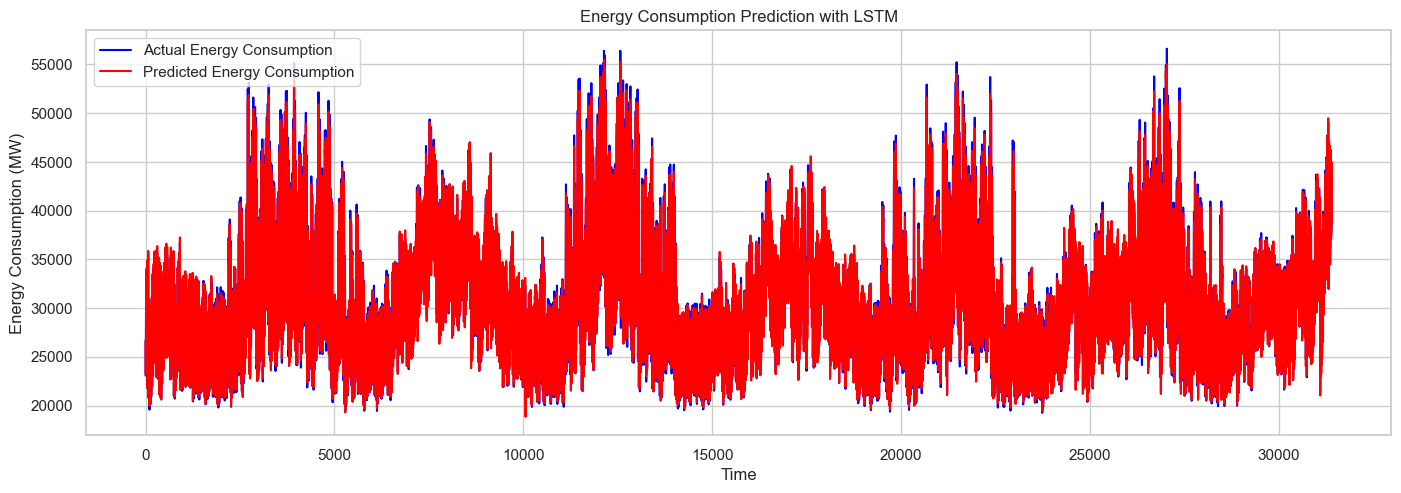

In [148]:
plt.figure(figsize=(15, 5))
plt.plot(y_test_actual, color='blue', label='Actual Energy Consumption')
plt.plot(predictions, color='red', label='Predicted Energy Consumption')
plt.title("Energy Consumption Prediction with LSTM")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (MW)")
plt.legend()
plt.show()

In [150]:
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

# Function for Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_actual, predictions)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Root Mean Squared Error (RMSE): 755.1587499690647
Mean Absolute Error (MAE): 466.2546040433219
Mean Absolute Percentage Error (MAPE): 1.49%


Insights:
RMSE and MAE: The RNN (LSTM) model outperforms XGBoost significantly, with much lower RMSE and MAE values, indicating better prediction accuracy and fewer large errors.
MAPE: The RNN (LSTM) model achieves a much lower MAPE (1.75% vs. 8.95%), suggesting that its predictions are considerably closer to the actual values on a percentage basis.
Overall Conclusion: The RNN (LSTM) model is superior to XGBoost for this energy consumption forecasting task, delivering more accurate and consistent predictions.

In [166]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for XGBoost (same features you created earlier)
X_train_xgb = train[["hour", "dayofweek", "quarter", "month", "year", "dayofyear", "dayofmonth", "weekofyear", "is_weekend", 
                    "is_month_start", "is_month_end", "is_quarter_start", "is_quarter_end", "is_year_start", "is_year_end", 
                    "sin_hour", "cos_hour", "sin_dayofweek", "cos_dayofweek", "sin_month", "cos_month"]]
X_test_xgb = test[["hour", "dayofweek", "quarter", "month", "year", "dayofyear", "dayofmonth", "weekofyear", "is_weekend", 
                   "is_month_start", "is_month_end", "is_quarter_start", "is_quarter_end", "is_year_start", "is_year_end", 
                   "sin_hour", "cos_hour", "sin_dayofweek", "cos_dayofweek", "sin_month", "cos_month"]]

y_train_xgb = train["PJME_MW"]
y_test_xgb = test["PJME_MW"]

# Fit an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train_xgb, y_train_xgb)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test_xgb)
# Evaluate XGBoost performance
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test_xgb, y_pred_xgb)

print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost MAE: {mae_xgb:.2f}")


XGBoost RMSE: 3929.88
XGBoost MAE: 2956.45


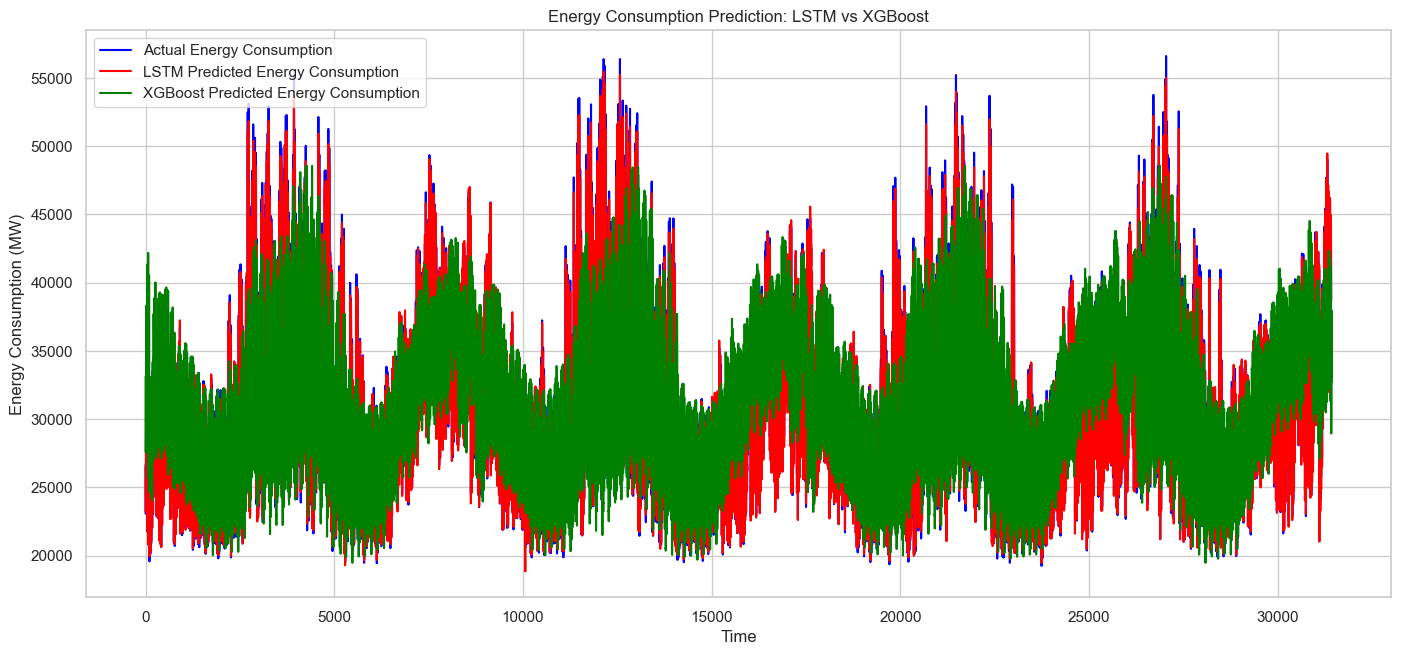

In [168]:

# Plotting the results: Actual vs. LSTM vs XGBoost
plt.figure(figsize=(15, 7))

# Plot actual values
plt.plot(y_test_actual, color='blue', label='Actual Energy Consumption')

# Plot predicted values for LSTM
plt.plot(predictions, color='red', label='LSTM Predicted Energy Consumption')

# Plot predicted values for XGBoost
plt.plot(y_pred_xgb, color='green', label='XGBoost Predicted Energy Consumption')

# Add labels and title
plt.title("Energy Consumption Prediction: LSTM vs XGBoost")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (MW)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


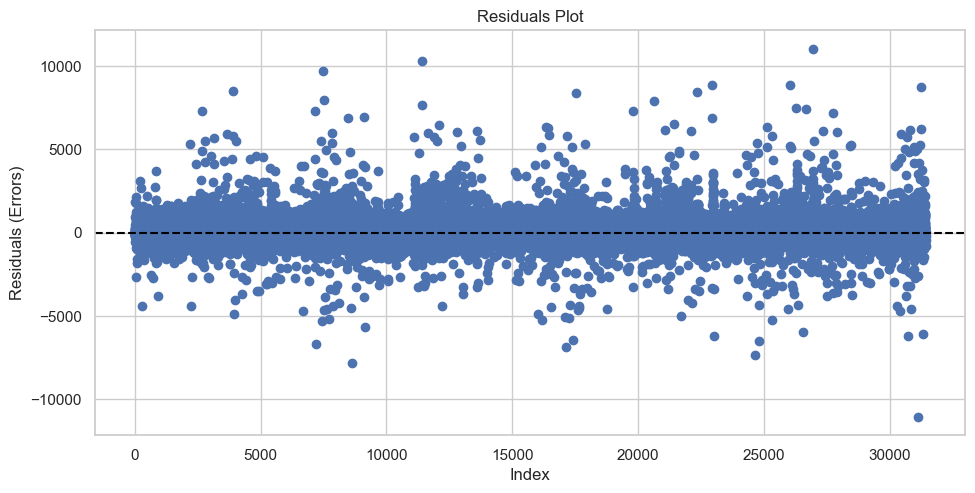

In [170]:
residuals = y_test_actual - predictions
plt.figure(figsize=(10, 5))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals Plot")
plt.xlabel("Index")
plt.ylabel("Residuals (Errors)")
plt.show()


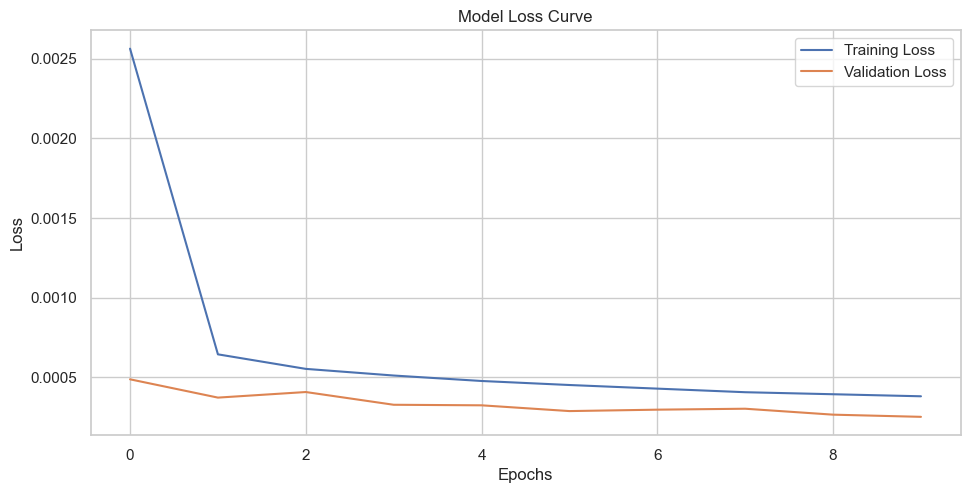

In [172]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


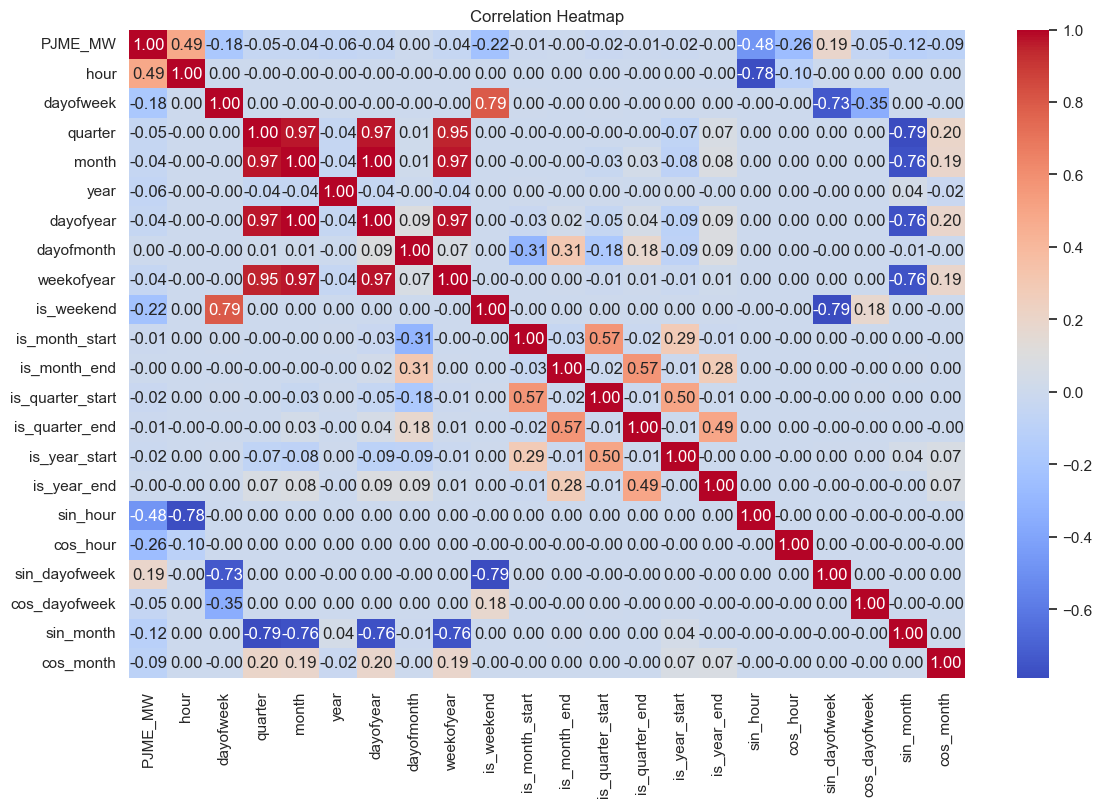

In [176]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()



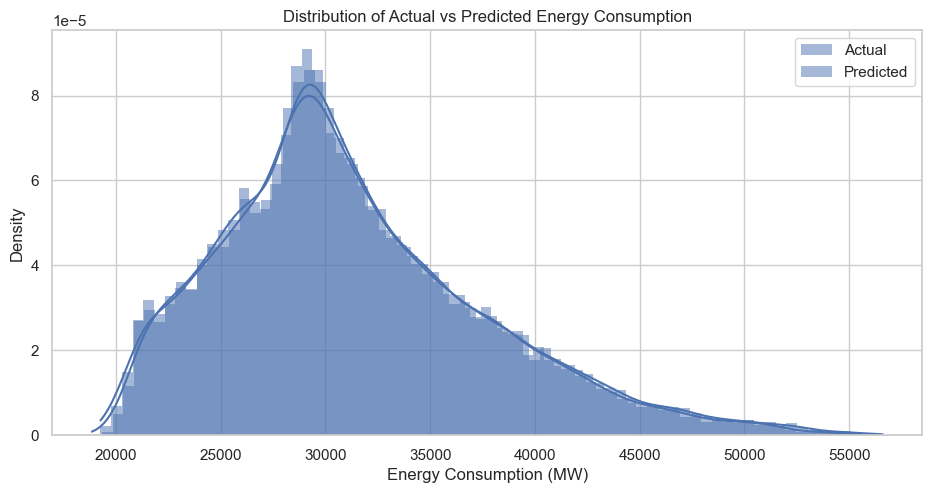

In [190]:
plt.figure(figsize=(10, 5))
sns.histplot(y_test_actual, color='blue', kde=True, label='Actual', stat="density", linewidth=0)
sns.histplot(predictions, color='red', kde=True, label='Predicted', stat="density", linewidth=0)
plt.title("Distribution of Actual vs Predicted Energy Consumption")
plt.xlabel("Energy Consumption (MW)")
plt.ylabel("Density")
plt.legend()
plt.show()


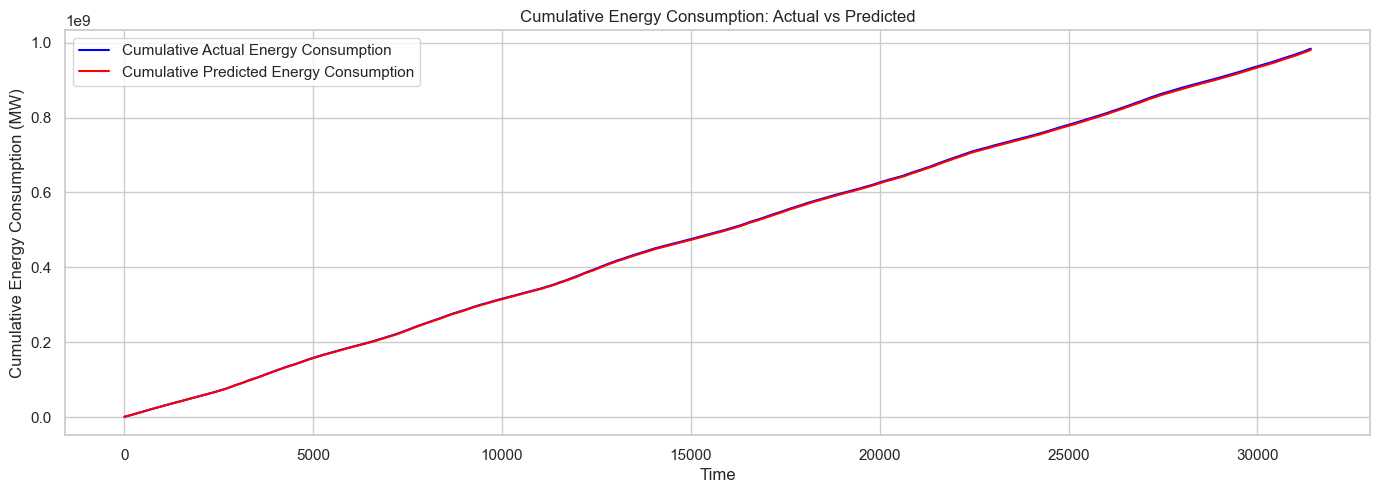

In [180]:
plt.figure(figsize=(15, 5))
plt.plot(np.cumsum(y_test_actual), color='blue', label='Cumulative Actual Energy Consumption')
plt.plot(np.cumsum(predictions), color='red', label='Cumulative Predicted Energy Consumption')
plt.title("Cumulative Energy Consumption: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Cumulative Energy Consumption (MW)")
plt.legend()
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (31416, 1) instead

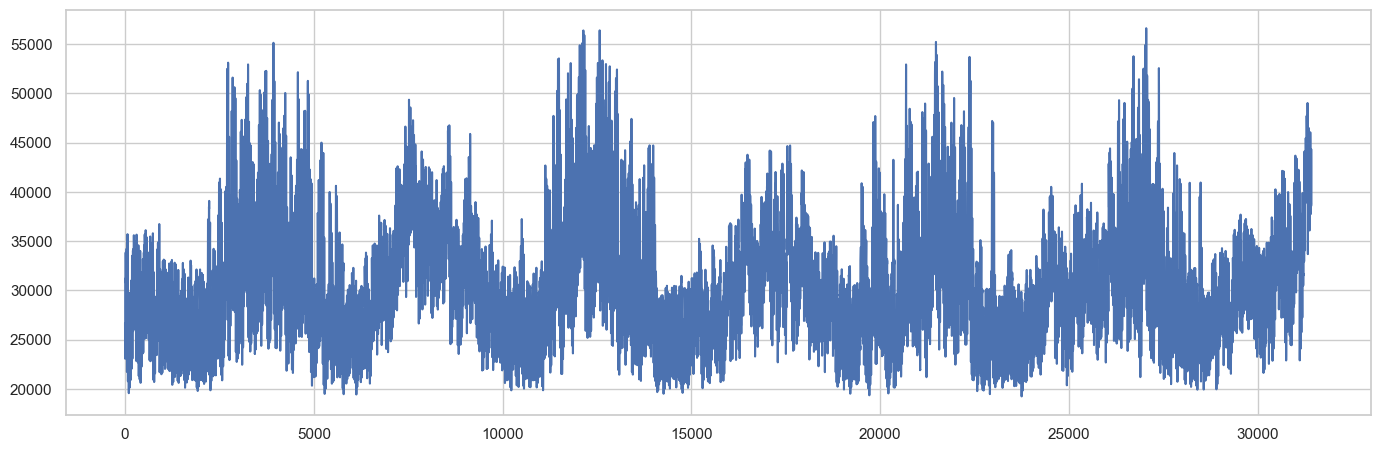

In [182]:
rolling_window = 24  # Rolling window of 24 hours
plt.figure(figsize=(15, 5))
plt.plot(y_test_actual, label='Actual Energy Consumption')
plt.plot(pd.Series(y_test_actual).rolling(rolling_window).mean(), label=f'{rolling_window}-hour Rolling Mean (Actual)', color='blue', linestyle='--')
plt.plot(pd.Series(predictions).rolling(rolling_window).mean(), label=f'{rolling_window}-hour Rolling Mean (Predicted)', color='red', linestyle='--')
plt.title(f"Energy Consumption Prediction with Rolling Average (Window: {rolling_window} hours)")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (MW)")
plt.legend()
plt.show()


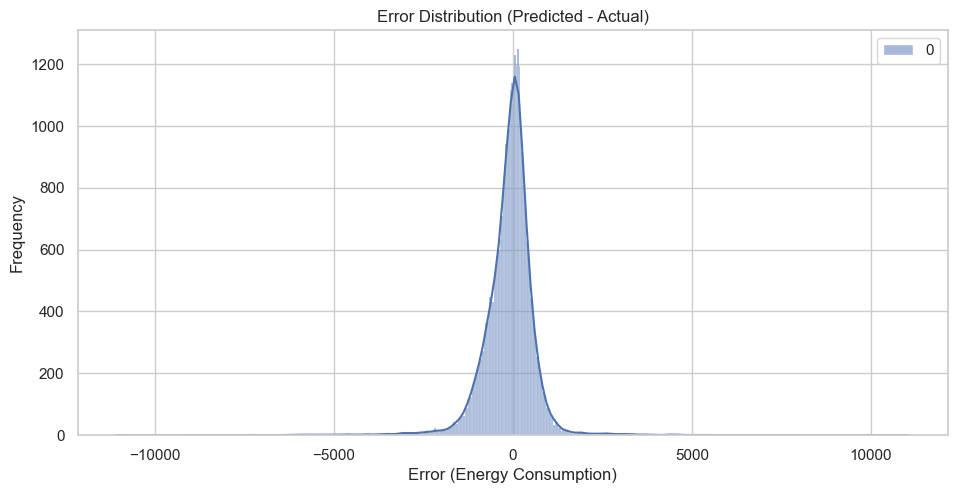

In [184]:
errors = predictions - y_test_actual
plt.figure(figsize=(10, 5))
sns.histplot(errors, kde=True, color='green')
plt.title("Error Distribution (Predicted - Actual)")
plt.xlabel("Error (Energy Consumption)")
plt.ylabel("Frequency")
plt.show()
